# import modules

In [109]:
import keras
from keras.utils import plot_model,to_categorical
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,LSTM,Bidirectional,TimeDistributed,Reshape,Conv1D,MaxPool1D,Concatenate,Dropout,BatchNormalization,Add
from keras import Model,Input
from keras import utils
from keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
import keras.backend as K
import keras.callbacks as kcallbacks
from sklearn.preprocessing import LabelEncoder
import string
from keras.optimizers import SGD
# from lsuv_init import LSUVinit

In [110]:
from keras import layers

# Load Features

In [111]:
X_features=np.load('./feature/X_gabor.npy')
y=np.load('./feature/y_pinyin.npy')

In [112]:
X_features.shape
X_features.shape[1:]

(35, 7)

In [113]:
y.shape

(4704, 5)

In [114]:
print(y)

[[ 2  1  0  0  0]
 [ 4  1  0  0  0]
 [ 5 18  0  0  0]
 ...
 [25 21  1 14  0]
 [25 21  0  0  0]
 [26  1 15  0  0]]


In [115]:
alphabet_set=list(string.ascii_letters[:26])

In [116]:
alphabet_set.insert(0,'0')

In [117]:
len(alphabet_set)

27

## One-hot Encoding

In [118]:
y=to_categorical(y,num_classes=27)

In [119]:
y.shape

(4704, 5, 27)

## split train and test

In [120]:
X_train, X_test, y_train, y_test=train_test_split(X_features,y,test_size=0.1,random_state=2019)

In [121]:
X_train.shape,X_test.shape

((4233, 35, 7), (471, 35, 7))

In [122]:
X_train = X_train.astype("float32") 
X_test = X_test.astype("float32") 

In [123]:
y_train.shape,y_test.shape

((4233, 5, 27), (471, 5, 27))

In [136]:
X_test.shape
input_shape=X_test.shape[1:]

<tf.Tensor 'input_32:0' shape=(None, 35, 7) dtype=float32>

In [125]:
X_train.shape

(4233, 35, 7)

# Models


In [126]:
NUM_CLASSES=27
BATCH_SIZE=128
EPOCHS=100
MODEL_SAVE_PATH='./model/pinyin_gabor_cnn.h5'

In [141]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv1D(filters=64,kernel_size=3,padding='same',activation="relu"),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(filters=64,kernel_size=3,padding='same',activation="relu"),
        layers.MaxPooling1D(pool_size=3),
        layers.Dropout(0.5),
        layers.Dense(27, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 35, 64)            1408      
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 17, 64)            0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 17, 64)            12352     
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 5, 64)             0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 5, 64)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 5, 27)             1755      
Total params: 15,515
Trainable params: 15,515
Non-trainable params: 0
_________________________________________________

In [142]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x=X_train,y=y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=(X_test,y_test),
                  callbacks=callback_list)

Epoch 1/100
29/34 [========================>.....] - ETA: 0s - loss: 14.3333 - accuracy: 0.0287
Epoch 00001: val_accuracy improved from -inf to 0.04204, saving model to ./model\pinyin_gabor_cnn.h5
34/34 [==============================] - 1s 16ms/step - loss: 14.3292 - accuracy: 0.0288 - val_loss: 14.1977 - val_accuracy: 0.0420
Epoch 2/100
31/34 [==========================>...] - ETA: 0s - loss: 14.2799 - accuracy: 0.0312
Epoch 00002: val_accuracy did not improve from 0.04204
34/34 [==============================] - 0s 6ms/step - loss: 14.2823 - accuracy: 0.0311 - val_loss: 14.6301 - val_accuracy: 0.0149
Epoch 3/100
29/34 [========================>.....] - ETA: 0s - loss: 14.3451 - accuracy: 0.0279
Epoch 00003: val_accuracy did not improve from 0.04204
34/34 [==============================] - 0s 6ms/step - loss: 14.3492 - accuracy: 0.0277 - val_loss: 14.6312 - val_accuracy: 0.0140
Epoch 4/100
23/34 [===================>..........] - ETA: 0s - loss: 14.3260 - accuracy: 0.0305
Epoch 00004

In [130]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
plot_model(model,'model_pinyin.jpg',show_shapes=True)
lr_reduce=kcallbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=6,verbose=1,min_lr=0.00001)
save_model=kcallbacks.ModelCheckpoint(filepath=MODEL_SAVE_PATH,monitor='val_accuracy',verbose=1,save_best_only=True)
callback_list=[save_model,lr_reduce]
history=model.fit(x=X_train,y=y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=(X_test,y_test),
                  callbacks=callback_list)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
Epoch 1/100


ValueError: in user code:

    D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1535 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4687 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 5, 27) and (None, 27) are incompatible


## plot_curve

In [34]:
from help import plot_curve,plot_curve_with_smooth

D:\Academic\FYP\corpus1\CODE\help.py:22: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1, len(history.history['accuracy']) + 1), len(history.history['accuracy']) / 10)
D:\Academic\FYP\corpus1\CODE\help.py:31: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1, len(history.history['loss']) + 1), len(history.history['loss']) / 10)


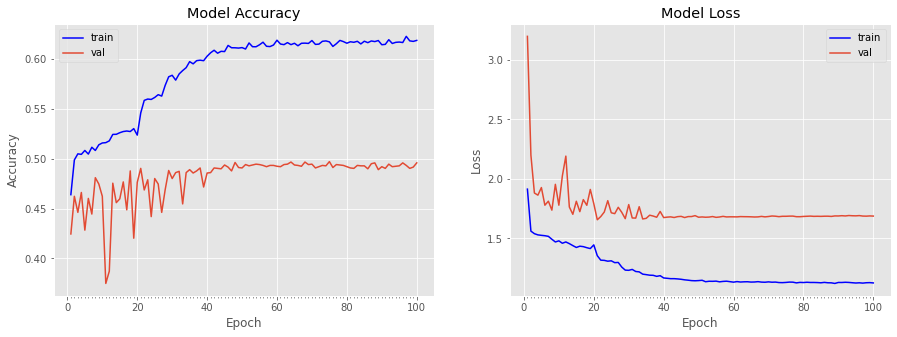

In [35]:
plot_curve(history)

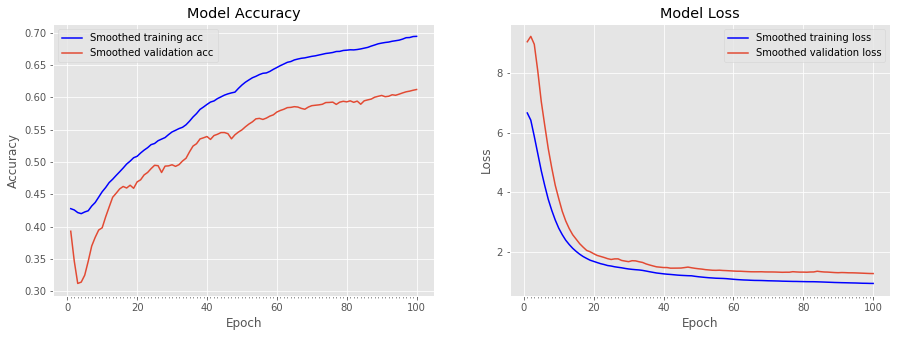

In [76]:
plot_curve_with_smooth(history)

## confusion_metrix

In [20]:
model.load_weights('./models/pinyin_gabor_cnn.h5')

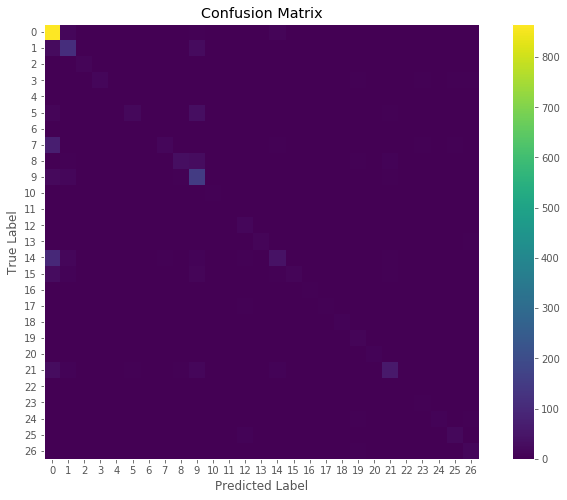

In [77]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=-1).ravel()
y_true=np.argmax(y_test,axis=-1).ravel()
con_matrix=confusion_matrix(y_true=y_true,y_pred=y_pred)
def plot_confusion_matrix(confusion_mat):
    plt.figure(figsize=(12,8))
    plt.imshow(confusion_mat)
    plt.title('Confusion Matrix')
    plt.colorbar()
    labels = list(range(0,27))
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.grid(False)
    plt.show() 
plot_confusion_matrix(con_matrix)

## classfication_report

In [78]:
from sklearn.metrics import classification_report


In [79]:
target_names=[alphabet_set[i] for i in range(27)]
print(classification_report(y_true,y_pred,digits=4,labels=list(range(27)),target_names=target_names))

             precision    recall  f1-score   support

          0     0.7498    0.9548    0.8400       907
          a     0.6129    0.6514    0.6316       175
          b     0.4583    0.5000    0.4783        22
          c     0.7000    0.3256    0.4444        43
          d     0.2143    0.2143    0.2143        14
          e     0.5862    0.2394    0.3400        71
          f     0.0000    0.0000    0.0000         5
          g     0.5517    0.1416    0.2254       113
          h     0.5926    0.3107    0.4076       103
          i     0.5396    0.7389    0.6237       203
          j     0.2400    0.3333    0.2791        18
          k     0.5000    0.1250    0.2000         8
          l     0.2258    0.4118    0.2917        34
          m     0.5000    0.4783    0.4889        23
          n     0.5059    0.2205    0.3071       195
          o     0.7222    0.1733    0.2796        75
          p     0.4167    0.4167    0.4167        12
          q     0.2500    0.2500    0.2500   

# predict test

In [81]:

temp = np.load('./gabor/person1_time1_group1_he_2.npy')
m,n = temp.shape
            #print(m)
if m <=35:
    left = 36 - m
    temp =np.append(temp,(np.zeros([left,n])),axis=0)
test =[]
test.append(temp[:35,])
test = np.array(test)
print(test.shape)
pred=model.predict(test)

pred=np.argmax(pred,axis=-1)[0]
text=[alphabet_set[i] for i in pred]
text=[i for i in text if i!='0']
text=''.join(text)
print('Predict Label:%s'%(text))

(1, 35, 7)
Predict Label:ji


In [82]:

temp = np.load('./gabor/person1_time1_group1_ba_1.npy')
m,n = temp.shape
            #print(m)
if m <=35:
    left = 36 - m
    temp =np.append(temp,(np.zeros([left,n])),axis=0)
test =[]
test.append(temp[:35,])
test = np.array(test)
print(test.shape)
pred=model.predict(test)

pred=np.argmax(pred,axis=-1)[0]
text=[alphabet_set[i] for i in pred]
text=[i for i in text if i!='0']
text=''.join(text)
print('Predict Label:%s'%(text))

(1, 35, 7)
Predict Label:maa


In [86]:

temp = np.load('./gabor/person2_time1_group1_da_4.npy')
m,n = temp.shape
            #print(m)
if m <=35:
    left = 36 - m
    temp =np.append(temp,(np.zeros([left,n])),axis=0)
test =[]
test.append(temp[:35,])
test = np.array(test)
print(test.shape)
pred=model.predict(test)

pred=np.argmax(pred,axis=-1)[0]
text=[alphabet_set[i] for i in pred]
text=[i for i in text if i!='0']
text=''.join(text)
print('Predict Label:%s'%(text))

(1, 35, 7)
Predict Label:maa


In [ ]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)